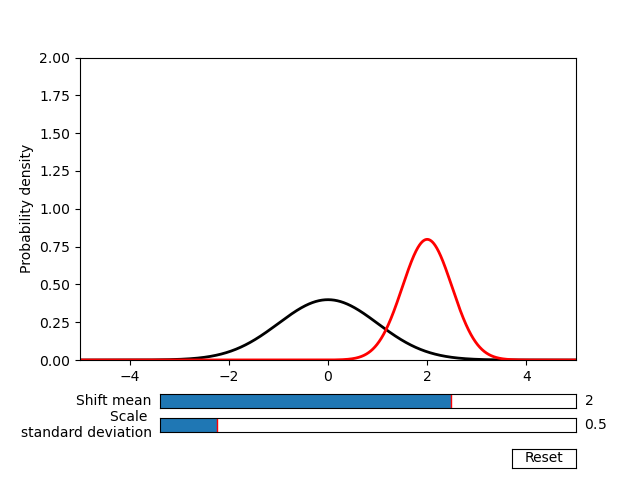

In [3]:
#HIDDEN
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from scipy.stats import norm

axis_color = 'white'

fig,ax = plt.subplots(1,1)
# ax = fig.add_subplot(111)

# Adjust the subplots region to leave some space for the sliders and buttons
fig.subplots_adjust(bottom=0.25)

x = np.arange(-5, 5, 0.001)
amp_0 = 2
freq_0 = 0.5

def normal(mean,standard):
    return(norm.pdf(x,loc=mean,scale=standard))
# Draw the initial plot
# The 'line' variable is used for modifying the line later
ax.plot(x, normal(0,1), linewidth=2, color='black')
[line] = ax.plot(x, normal(amp_0,freq_0), linewidth=2, color='red')
ax.set_xlim([-5, 5])
ax.set_ylim([0, 2])
ax.set_ylabel('Probability density')

# Add two sliders for tweaking the parameters

# Define an axes area and draw a slider in it
amp_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
amp_slider = Slider(amp_slider_ax, 'Shift mean', -5, 5, valinit=amp_0)

# Draw another slider
freq_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
freq_slider = Slider(freq_slider_ax, 'Scale \nstandard deviation', 0.1, 3, valinit=freq_0)

# Define an action for modifying the line when any slider's value changes
def sliders_on_changed(val):
    line.set_ydata(normal(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()
amp_slider.on_changed(sliders_on_changed)
freq_slider.on_changed(sliders_on_changed)

# Add a button for resetting the parameters
reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
def reset_button_on_clicked(mouse_event):
    freq_slider.reset()
    amp_slider.reset()
reset_button.on_clicked(reset_button_on_clicked)

plt.show()